Dataset loaded successfully!
Columns in dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred

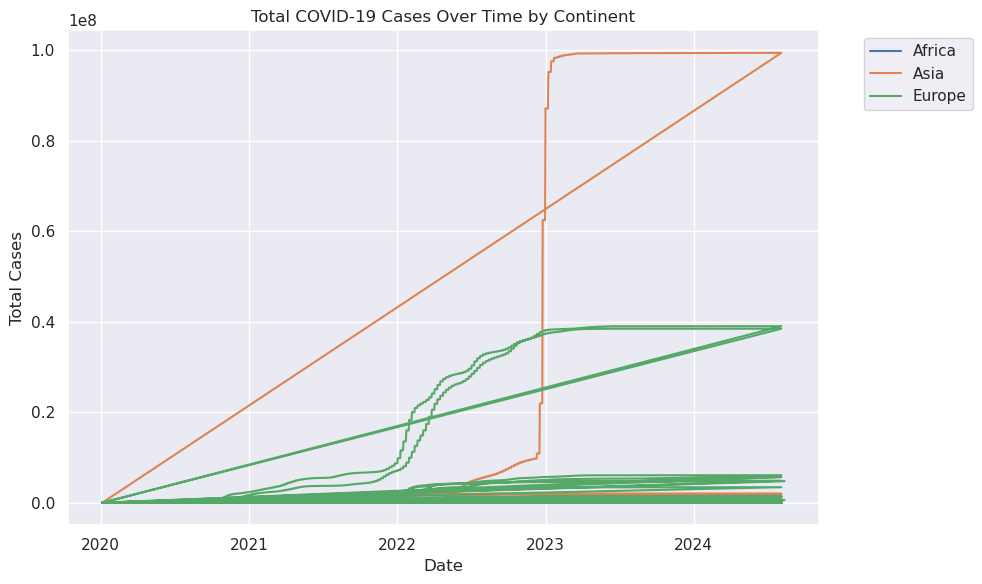

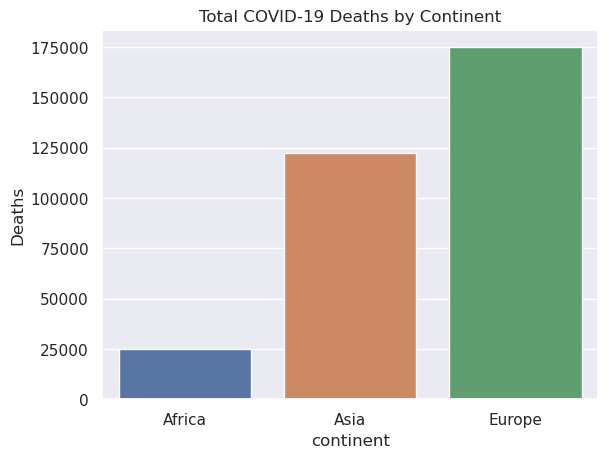

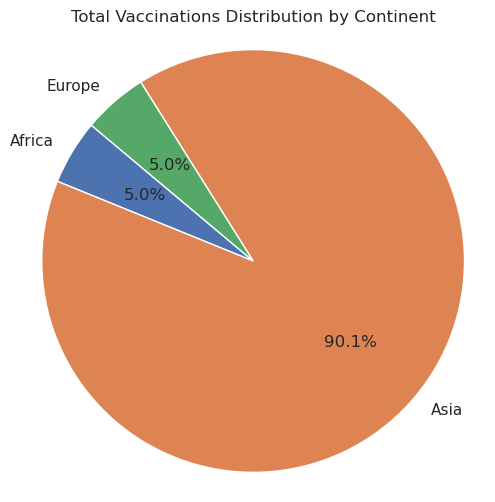

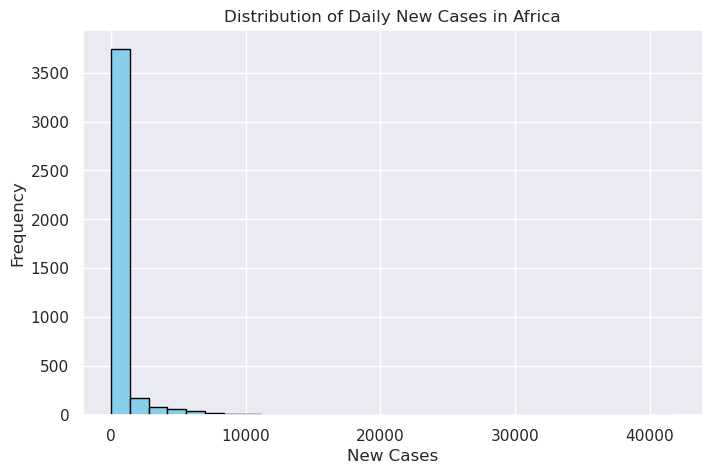

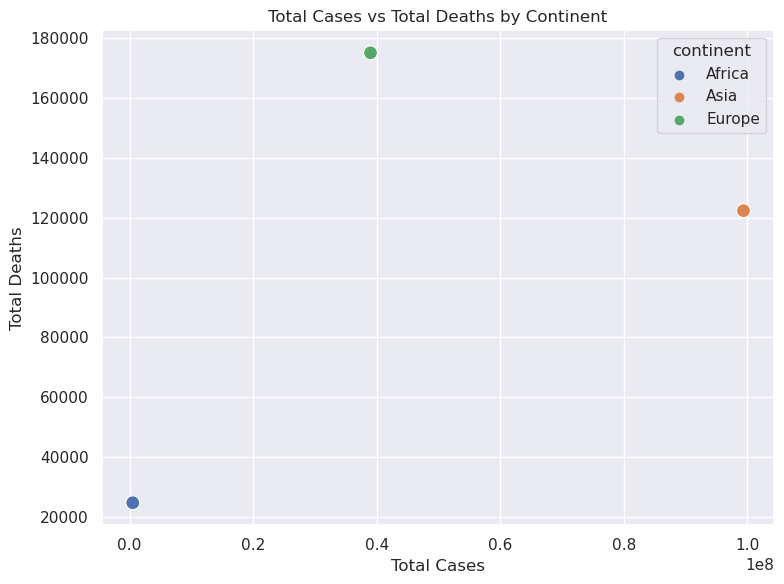

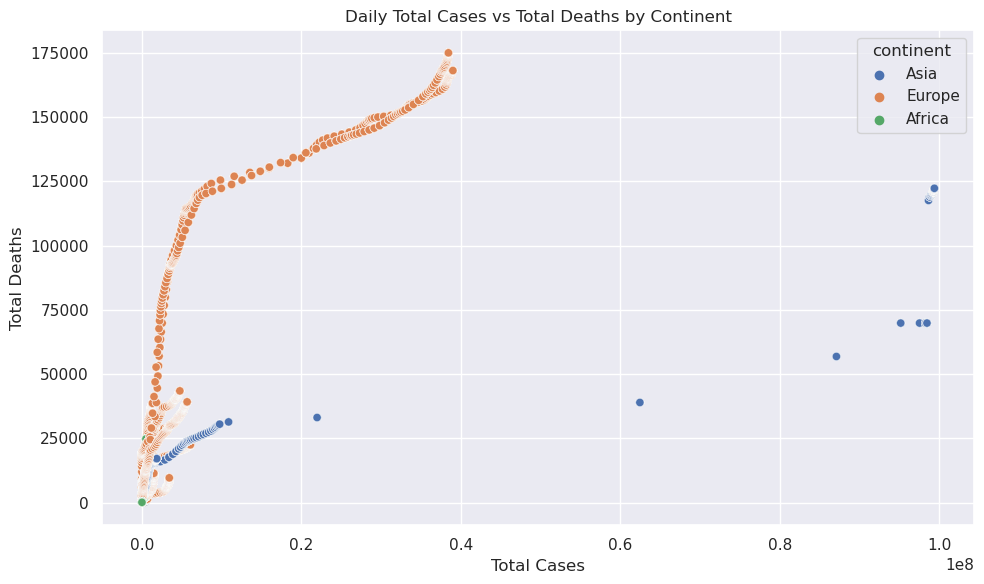


 Observations:
- Europe shows the highest cumulative cases and deaths among selected continents.
- Africa's numbers are relatively lower, possibly due to underreporting or lower testing.
- Asia had significant vaccination rollout.



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Inline plotting
%matplotlib inline

# Seaborn style
sns.set(style='darkgrid')

# Load CSV with low_memory=False to handle mixed-type columns warning
file_path = "owid-covid-data.csv"

try:
    df = pd.read_csv(file_path, low_memory=False)  # Fix for mixed types in columns
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found.")
    raise

# Show actual columns
print("Columns in dataset:")
print(df.columns.tolist())

# Use continent-based data
df = df[['date', 'continent', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'population']]
df = df.dropna(subset=['date', 'continent'])
df['date'] = pd.to_datetime(df['date'])
df.fillna(method='ffill', inplace=True)

# Filter continents of interest
continents = ['Africa', 'Asia', 'Europe']
df_continents = df[df['continent'].isin(continents)]

# Summary by continent
summary = df_continents.groupby('continent')[['total_cases', 'total_deaths', 'total_vaccinations']].max()
print("\n Summary by continent:")
print(summary)

# Line Chart – Total Cases Over Time
plt.figure(figsize=(10, 6))
for continent in continents:
    data = df_continents[df_continents['continent'] == continent]
    plt.plot(data['date'], data['total_cases'], label=continent)

plt.title("Total COVID-19 Cases Over Time by Continent")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Bar Chart – Total Deaths by Continent
sns.barplot(x=summary.index, y=summary['total_deaths'])
plt.title("Total COVID-19 Deaths by Continent")
plt.ylabel("Deaths")
plt.show()

#Pie Chart – Total Vaccinations Distribution
plt.figure(figsize=(6, 6))
plt.pie(summary['total_vaccinations'], labels=summary.index, autopct='%1.1f%%', startangle=140)
plt.title("Total Vaccinations Distribution by Continent")
plt.axis('equal')
plt.show()

# Improved Histogram – Daily New Cases in First Continent
first_continent = continents[0]
continent_data = df_continents[df_continents['continent'] == first_continent]

# Filter out 0 or NaN new cases
filtered_new_cases = continent_data['new_cases'].dropna()
filtered_new_cases = filtered_new_cases[filtered_new_cases > 0]

if not filtered_new_cases.empty:
    plt.figure(figsize=(8, 5))
    plt.hist(filtered_new_cases, bins=30, edgecolor='black', color='skyblue')
    plt.title(f"Distribution of Daily New Cases in {first_continent}")
    plt.xlabel("New Cases")
    plt.ylabel("Frequency")
    plt.show()
else:
    print(f"No valid new case data for {first_continent}.")

# Scatter Plot – Total Cases vs Total Deaths by Continent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=summary.reset_index(), x='total_cases', y='total_deaths', hue='continent', s=100)
plt.title("Total Cases vs Total Deaths by Continent")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.tight_layout()
plt.show()

# Optional: Detailed Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_continents, x='total_cases', y='total_deaths', hue='continent', alpha=0.5)
plt.title("Daily Total Cases vs Total Deaths by Continent")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.tight_layout()
plt.show()

# Observations
print("""
 Observations:
- Europe shows the highest cumulative cases and deaths among selected continents.
- Africa's numbers are relatively lower, possibly due to underreporting or lower testing.
- Asia had significant vaccination rollout.
""")
